┌───┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├
   └───┘└───────┘

┌───┐┌───────┐┌───────┐
q: ┤ H ├┤ Rz(θ) ├┤ Rx(Φ) ├
   └───┘└───────┘└───────┘

values of theta [3.448296944257913, 4.493667318642264]
values of phi [3.787273988239316, 3.4236020095353483]
state vector Statevector([-0.10801183-0.69880859j, -0.10801183+0.69880859j],
            dims=(2,))
state_vec.data[1] (-0.10801182726385347+0.6988085897948904j)
state_vec.data[0] (-0.10801182726385347-0.6988085897948904j)
values of phi in state to bloch 3.448296944257913
values of theta in state to bloch 1.5707963267948966
state vector Statevector([ 0.69697477+0.32413696j, -0.62843873-0.11927351j],
            dims=(2,))
state_vec.data[1] (-0.6284387264172107-0.11927351463203237j)
state_vec.data[0] (0.6969747690607762+0.32413695737930603j)
values of phi in state to bloch -3.389339340571359
values of theta in state to bloch 1.3881045678606128
state vector Statevector([-0.44244154-0.55158452j, -0.44244154+0.55158452j],
            dims=(2,))
state_vec.data[1] (-0.44244154470791613+0.5515845171109075j)
state_vec.data[0] (-0.44244154470791613-0.5515845171109075j)
values of phi in st

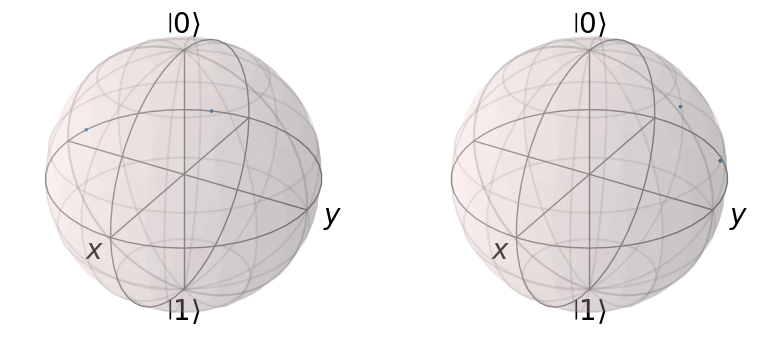

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter

from qiskit.circuit import QuantumCircuit, Parameter
# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)
display(qc_A.draw())
display(qc_B.draw())
# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 2

theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]
print("values of theta", theta)
print("values of phi", phi)
# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    print("state vector", state_vec)
    print("state_vec.data[1]", state_vec.data[1])
    print("state_vec.data[0]", state_vec.data[0])
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))

    print("values of phi in state to bloch", phi)
    print("values of theta in state to bloch", theta)
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()